### Load the data

In [1]:
import h5py
import numpy as np
from sklearn.utils import shuffle


X_train = []
X_test = []

for filename in ["gap_ResNet50.h5", "gap_Xception.h5", "gap_InceptionV3.h5"]:
    with h5py.File(filename, 'r') as h:
        X_train.append(np.array(h['train']))
        X_test.append(np.array(h['test']))
        y_train = np.array(h['label'])

X_train = np.concatenate(X_train, axis=1)
X_test = np.concatenate(X_test, axis=1)

X_train, y_train = shuffle(X_train, y_train)

### Compile the model

In [12]:
from keras.models import *
from keras.layers import *

input_tensor = Input(X_train.shape[1:])
x = input_tensor
x = Dropout(0.5)(x)
x = Dense(256, activation='relu', name='fc1')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu', name='fc2')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(input_tensor, x)

model.compile(optimizer='adadelta',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Train the model

In [13]:
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping

## Callback for loss logging per epoch
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))

history = LossHistory()
model.fit(X_train, y_train, batch_size=128, nb_epoch=8, validation_split=0.25,
          verbose=1, shuffle=True, callbacks=[history])

/home/ust.hk/czhaoam/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 18750 samples, validate on 6250 samples
Epoch 1/8
18750/18750 [==============================] - 12s - loss: 0.0723 - acc: 0.9732 - val_loss: 0.0212 - val_acc: 0.9928

KeyboardInterrupt: 

### Draw the image

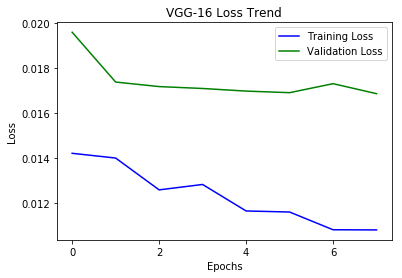

In [5]:
model.save('model.h5')
loss = history.losses
import matplotlib.pyplot as plt
from matplotlib import ticker
%matplotlib inline
val_loss = history.val_losses

fig=plt.figure();
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('VGG-16 Loss Trend')
plt.plot(loss, 'blue', label='Training Loss')
plt.plot(val_loss, 'green', label='Validation Loss')
plt.xticks(range(0,8)[0::2])
plt.legend()
plt.show()
fig.savefig('random.png')

### Predict

In [6]:
y_pred = model.predict(X_test, verbose=1)
y_pred = y_pred.clip(min=0.005, max=0.995)

12288/12500 [============================>.] - ETA: 0s

In [9]:
# import pandas as pd
# import os
# import shutil
# from keras.preprocessing.image import *

# def rmrf_mkdir(dirname):
#     if os.path.exists(dirname):
#         shutil.rmtree(dirname)
#     os.mkdir(dirname)

# rmrf_mkdir('test2')
# os.symlink('../input/test/', 'test2/test')
# df = pd.read_csv("sample_submission.csv")

# image_size = (224, 224)
# gen = ImageDataGenerator()
# test_generator = gen.flow_from_directory("./test2/", image_size, shuffle=False, 
#                                          batch_size=16, class_mode=None)
# TEST_DIR = '../input/test/'
# test_images =  [TEST_DIR+i for i in os.listdir(TEST_DIR)]

# for i, fname in enumerate(test_images):
#     index = int()
#     a=i.split('.')[-2]
#     a=a.split('/')[3]
#     df.set_value(index-1, 'label', y_pred[i])

# df.to_csv('pred.csv', index=None)
# df.head(10)

Found 0 images belonging to 0 classes.


AttributeError: 'int' object has no attribute 'split'